
**Multi Class Classification - Fruits Classificaltion- Using Tensorflow Model for Mobile app**

In [3]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-06-03 11:10:43--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.142.24, 104.192.142.25, 104.192.142.26, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.1MB/s    in 6.2s    

2025-06-03 11:10:51 (16.3 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [4]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [6]:
tf.__version__

'2.18.0'

In [7]:
img_height,img_width=32,32
batch_size=20

train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "fruits/train",
    image_size=(img_height,img_width),
    batch_size=batch_size
)
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "fruits/validation",
    image_size=(img_height,img_width),
    batch_size=batch_size
)
test_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "fruits/test",
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


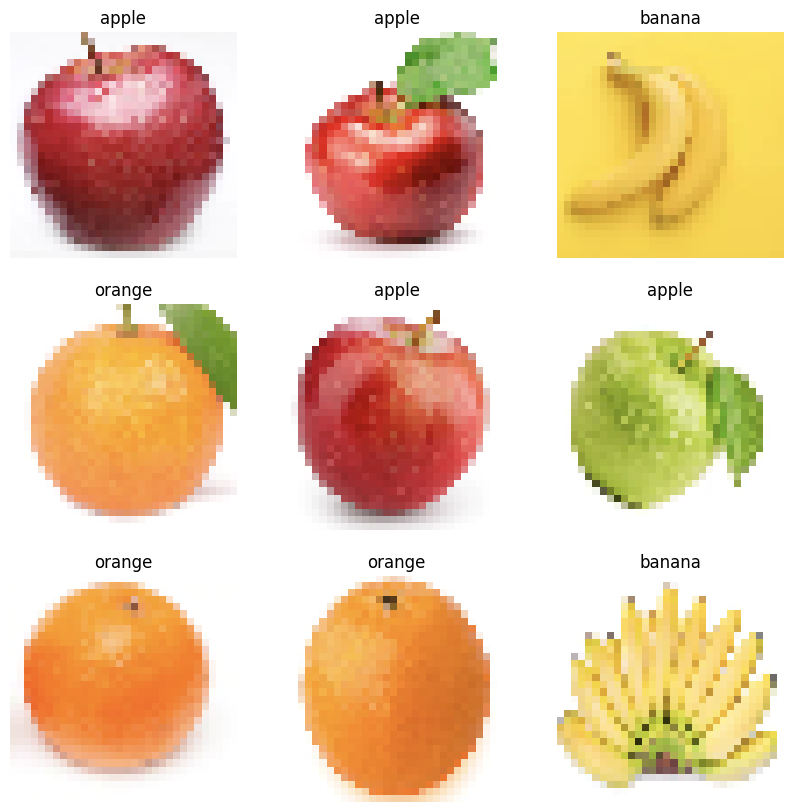

In [9]:
class_names=["apple","banana","orange"]
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
model=tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32,3,activation="relu"),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(64,3,activation="relu"),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(128,3,activation="relu"),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation="softmax"),
        tf.keras.layers.Dense(3)

    ]
)

In [17]:
model.compile(
    optimizer="rmsprop",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)


In [18]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.3452 - loss: 1.0983 - val_accuracy: 0.3485 - val_loss: 1.0948
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.4529 - loss: 1.0826 - val_accuracy: 0.4545 - val_loss: 1.0589
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5134 - loss: 1.0435 - val_accuracy: 0.5000 - val_loss: 0.9882
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.5785 - loss: 0.9851 - val_accuracy: 0.5152 - val_loss: 0.9663
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.5812 - loss: 0.9584 - val_accuracy: 0.5303 - val_loss: 0.9525
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6521 - loss: 0.9353 - val_accuracy: 0.6818 - val_loss: 0.9556
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.7027 - loss: 0.9263 - val_accuracy: 0.5455 - val_loss: 0.9243
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7791 - loss: 0.8907 - val_accuracy: 0.7121 - 

In [19]:
model.evaluate( test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9090 - loss: 0.6355


[0.6347762942314148, 0.9076923131942749]

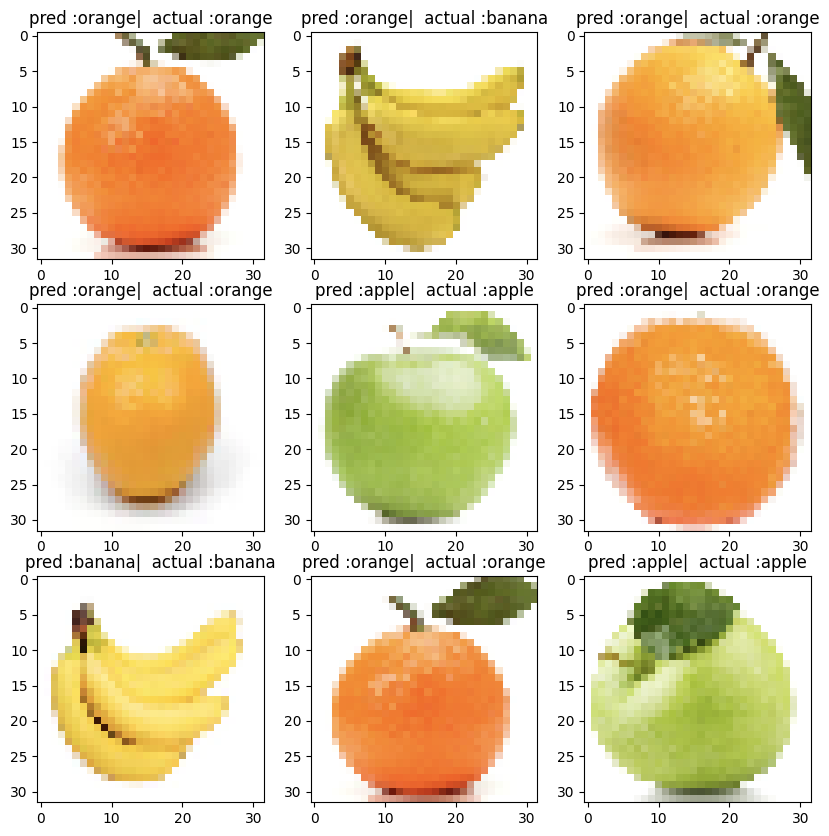

In [22]:
import numpy as np
plt.figure(figsize=(10,10))
for images,labels in test_ds.take(1):
  classifications=model(images)

  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index=np.argmax(classifications[i])
    plt.title("pred :"+class_names[index]+"|  actual :"+class_names[labels[i]])

In [23]:
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()
with open("model.tflite","wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp_ggofq06'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  140034534572880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140034534576528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140034534576720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140034534577680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140034534577104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140034534578640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140034534579024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140034534579984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140034534580368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140034534581328: TensorSpec(shape=(), dtype=tf.resource, name=None)
